# Zomato Restaurants India EDA & Marketing Campaign

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from datetime import datetime
import ast
from collections import Counter

In [2]:
df = pd.read_csv('zomato.csv')
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [3]:
# to read the column headers 
print("Columns in the data frame are :", df.columns)

Columns in the data frame are : Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')


In [4]:
df.columns.str.strip()
#The str.strip() to remove any additional spaces and additional line 

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [5]:
print("The shape of the data frame is:", df.shape) #will give us the number of rows and then columns (rows, columns)

The shape of the data frame is: (211944, 26)


In [8]:
df.head(10) #it is a default function and return 1st 10 rows or we can also write 5 in the paranthesis () 

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
8,3401284,Cake House,['Bakery'],https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,...,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,Average,322,14,0.0,1,-1
9,3400838,Sugar N Thyme,['Café'],https://www.zomato.com/agra/sugar-n-thyme-tajg...,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,...,3,Rs.,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,Very Good,289,324,0.0,1,-1


In [9]:
df.tail() #to fetch last 5 rows

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [10]:
# Calculating the unique number of values in each column
unique_values_count = df.nunique()

# Converting the series to a DataFrame for better presentation
unique_values_table = unique_values_count.reset_index()
unique_values_table.columns = ['Column', 'Unique Values Count']

unique_values_table

,Column,Unique Values Count
0,res_id,55568
1,name,41100
2,establishment,27
3,url,55568
4,address,50657
5,city,99
6,city_id,83
7,locality,3731
8,latitude,53362
9,longitude,53326


In [11]:
df.establishment.unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [12]:
#The names of all the cities 
df.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [13]:
df.city_id.unique()

array([   34,    11, 11303, 11297,    24, 11335,    22,    25,     4,
          26,    29,    12,     7,    30, 11289, 11324,    35,     1,
       11309,    15,    13, 11311, 11339,    21, 11337, 11291,     6,
          14, 11336,    10, 11306, 11307, 11321, 11338, 11352, 11301,
       11322,    23, 11354,     9, 11334,     2, 11302,     8,    20,
       11295, 11308,    31, 11299, 11329,     3, 11304,    36,    33,
       11328,    16, 11079,    18, 11314, 11333,    40,    37,     5,
       11293, 11310, 11294,    27, 11305, 11331,    19, 11327, 11076,
          38, 11298, 11323, 11332, 11290, 11054,    39, 11330, 11300,
          28,    32], dtype=int64)

In [14]:
df.price_range.unique()

array([2, 1, 3, 4], dtype=int64)

In [15]:
df.rating_text.unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

Tasks:

Data Cleaning and Preparation:

 
1. Identify and handle missing values.
2. Detect and correct any inconsistencies in the dataset (e.g., data types,
mislabeled categories).
3. Feature engineering (if necessary), like extracting useful information from
existing data.


In [16]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Converting the series to a DataFrame for better presentation
missing_values_table = missing_values.reset_index()
missing_values_table.columns = ['Column', 'Missing Values']

missing_values_table

,Column,Missing Values
0,res_id,0
1,name,0
2,establishment,0
3,url,0
4,address,134
5,city,0
6,city_id,0
7,locality,0
8,latitude,0
9,longitude,0


Key Observations:

1. The zipcode column has the highest number of missing values (163,187).
2. The timings and cuisines columns also have a significant number of missing values, 3,874 and 1,391 respectively.
3. Minor missing values are observed in the address (134) and opentable_support (48) columns.
4. The rest of the columns do not have missing values.
5. These missing values might impact certain types of analyses, especially those involving the zipcode, timings, and cuisines columns. Depending on your analysis goals, we may need to consider handling these missing values appropriately, either by imputing, removing, or ignoring them.

To check for outliers in the dataset, we typically focus on numerical columns as outliers are most meaningful in this context. The key numerical columns in the `df` dataset include:

1. `average_cost_for_two`
2. `aggregate_rating`
3. `votes`
4. `photo_count`
5. `latitude` and `longitude` (though these are geographical coordinates, extreme values could indicate incorrect data)

We can use statistical methods such as the Interquartile Range (IQR) to identify outliers. However, it's important to note that what constitutes an outlier can depend on the specific context and understanding of the data.

Let's proceed to check for outliers in these columns.

The boxplots for the numerical columns in the dataset provide insights into potential outliers:

1. **`average_cost_for_two`**: There are several points far above the upper whisker, indicating outliers with exceptionally high costs.

2. **`aggregate_rating`**: This column seems to have a few outliers on the lower side, but they're not as pronounced.

3. **`votes`**: There's a significant number of outliers, indicated by points far above the upper whisker. These represent restaurants with an unusually high number of votes.

4. **`photo_count`**: Similar to `votes`, this column shows a lot of outliers above the upper whisker, indicating some restaurants have a much higher number of photos than typical.

5. **`latitude` and `longitude`**: These columns don't seem to have pronounced outliers, which is expected as they represent geographical coordinates. However, any extreme values far from the median could indicate incorrect data.

When dealing with outliers, it's crucial to consider the context and reason behind these extreme values. They might represent genuine data points (like a very popular or expensive restaurant), errors in data entry, or anomalies. The decision to remove, adjust, or keep these outliers should align with your specific analytical goals and the nature of your investigation.

# Deleting Duplicates

In [17]:
df.drop_duplicates(["res_id"], keep='first', inplace=True)
(df.shape)

(55568, 26)

# Dropping zipcode

In [18]:
df.drop(columns=['zipcode'], inplace=True)
df.shape
#The column is dropped that is why showing error

(55568, 25)

Checking missing values once again

In [21]:
df.isnull().sum()

res_id                     0
name                       0
establishment              0
url                        0
address                   18
city                       0
city_id                    0
locality                   0
latitude                   0
longitude                  0
country_id                 0
locality_verbose           0
cuisines                 470
timings                 1003
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support         12
delivery                   0
takeaway                   0
dtype: int64

# Dealing Missing Values Now

In [22]:
# Filling missing values in 'opentable_support' with the mean (or 0 if the mean is 0)
mean_opentable_support = df['opentable_support'].mean()
df['opentable_support'].fillna(mean_opentable_support, inplace=True)

# Filling missing values in 'address' with 'Unknown'
df['address'].fillna('Unknown', inplace=True)

In [23]:
#Filling missing cuisines with the term "Unknown"
df['cuisines'].fillna('Unknown', inplace=True)

In [24]:
df.isnull().sum()

res_id                     0
name                       0
establishment              0
url                        0
address                    0
city                       0
city_id                    0
locality                   0
latitude                   0
longitude                  0
country_id                 0
locality_verbose           0
cuisines                   0
timings                 1003
average_cost_for_two       0
price_range                0
currency                   0
highlights                 0
aggregate_rating           0
rating_text                0
votes                      0
photo_count                0
opentable_support          0
delivery                   0
takeaway                   0
dtype: int64

Displaying a sample of timings enteries

In [25]:
# Display a random sample of 1000 unique 'timings' entries
sample_timings = df['timings'].dropna().unique()
print(sample_timings[:10])

['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' '8am – 11pm (Mon-Sun)' '11:30 AM to 11:30 PM'
 '10:57 AM to 11 PM'
 '11am – 10:35pm (Mon, Tue, Wed, Fri, Sat), 11am – 10:30pm (Thu),11am – 10:45pm (Sun)'
 '9 AM to 9 PM' '12midnight – 1am, 11:30am – 12midnight (Mon-Sun)'
 '4pm – 1am (Mon-Sun)']


In [26]:
def convert_to_24hr(time_str):
    # Replace 'noon' and 'midnight' with standard times
    time_str = time_str.replace('noon', '12:00 PM').replace('midnight', '12:00 AM')

    # Handling different possible formats
    formats = ['%I:%M%p', '%I %p', '%I:%M %p', '%I%p', '%H:%M']
    for fmt in formats:
        try:
            converted_time = datetime.strptime(time_str, fmt).strftime('%H:%M')
            # Special handling for midnight as '00:00'
            if '12:00 AM' in time_str:
                return '00:00'
            return converted_time
        except ValueError:
            continue
    return 'Unknown'

def parse_timings_and_slots(timing):
    if pd.isna(timing) or not isinstance(timing, str):
        return 'Unknown', 'Unknown', 'single'

    # Split timings on comma for multiple time slots
    slots = timing.split(',')
    time_frames = "multiple" if len(slots) > 1 else "single"

    # Extract opening and closing times
    opening_times = re.findall(r'(\d{1,2}(:\d{2})?\s*(AM|PM|am|pm|noon|midnight))', slots[0])
    closing_times = re.findall(r'(\d{1,2}(:\d{2})?\s*(AM|PM|am|pm|noon|midnight))', slots[-1])

    opening_time = convert_to_24hr(opening_times[0][0]) if opening_times else 'Unknown'
    closing_time = convert_to_24hr(closing_times[-1][0]) if closing_times else 'Unknown'

    return opening_time, closing_time, time_frames

# Apply the function to the DataFrame
df['Opening Time'], df['Closing Time'], df['Time Frames'] = zip(*df['timings'].apply(parse_timings_and_slots))

# Display the first few rows to confirm the changes
df[['timings', 'Opening Time', 'Closing Time', 'Time Frames']].head(15)


,timings,Opening Time,Closing Time,Time Frames
0,8:30am – 10:30pm (Mon-Sun),08:30,22:30,single
1,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",12:30,13:00,multiple
2,9:30 AM to 11 PM,09:30,23:00,single
3,8am – 11pm (Mon-Sun),08:00,23:00,single
4,11:30 AM to 11:30 PM,11:30,23:30,single
5,10:57 AM to 11 PM,10:57,23:00,single
6,"11am – 10:35pm (Mon, Tue, Wed, Fri, Sat), 11am...",11:00,22:45,multiple
7,10:57 AM to 11 PM,10:57,23:00,single
8,9 AM to 9 PM,09:00,21:00,single
9,"12midnight – 1am, 11:30am – 12midnight (Mon-Sun)",Unknown,Unknown,multiple


Replacing the missing values in timings column and preceding new columns with mode

In [28]:
# Calculate the mode (most frequent value) for each column
mode_timings = df['timings'].mode()[0]
mode_opening_time = df['Opening Time'].mode()[0]
mode_closing_time = df['Closing Time'].mode()[0]


# Fill missing values with the mode
df['timings'].fillna(mode_timings, inplace=True)
df['Opening Time'].fillna(mode_opening_time, inplace=True)
df['Closing Time'].fillna(mode_closing_time, inplace=True)


# Display the first few rows to confirm the changes
df[['timings', 'Opening Time', 'Closing Time']].head()

,timings,Opening Time,Closing Time
0,8:30am – 10:30pm (Mon-Sun),08:30,22:30
1,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",12:30,13:00
2,9:30 AM to 11 PM,09:30,23:00
3,8am – 11pm (Mon-Sun),08:00,23:00
4,11:30 AM to 11:30 PM,11:30,23:30


In [29]:
df.establishment.unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

This code will simplify the establishment column and make it more amenable to analysis, such as grouping, aggregation, and visualization. 

In [32]:
# For safely evaluating strings as Python expressions

def process_establishment(entry):
    # Convert the string representation of a list into an actual list
    try:
        establishments = ast.literal_eval(entry)
        if establishments:  # Check if the list is not empty
            return establishments[0]  # Return the first item (or handle multiple items as needed)
        else:
            return 'Unknown'  # Handle empty lists
    except:
        return 'Unknown'  # Handle any exceptions (e.g., malformed strings)

# Apply this function to the 'establishment' column
df['establishment'] = df['establishment'].apply(process_establishment)

# Check the transformation
df['establishment'].value_counts()

establishment
Quick Bites        14032
Casual Dining      12270
Café                4123
Bakery              3741
Dessert Parlour     3675
Sweet Shop          2615
Beverage Shop       2440
Unknown             1830
Fine Dining         1535
Food Court          1494
Bar                 1399
Dhaba               1282
Kiosk               1126
Food Truck           868
Lounge               820
Bhojanalya           632
Mess                 361
Pub                  357
Paan Shop            320
Confectionery        218
Butcher Shop         154
Club                 112
Microbrewery         110
Shack                 20
Cocktail Bar          16
Irani Cafe            14
Pop up                 4
Name: count, dtype: int64

In [33]:
df.rating_text.unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Bardzo dobrze', 'Muito Bom', 'İyi', 'Çok iyi', 'Baik',
       'Sangat Baik', 'Skvělé', 'Muy Bueno', 'Průměr', 'Ortalama',
       'Skvělá volba', 'Muito bom', 'Velmi dobré', 'Excelente', 'Bom',
       'Scarso', 'Promedio', 'Vynikajúce', 'Bueno', 'Dobré', 'Terbaik',
       'Harika', 'Veľmi dobré', 'Eccellente', 'Buono', 'Média', 'Dobrze'],
      dtype=object)

The rating_text column has rating in other languages like portugeez. The below function will change these values in English.

In [34]:
def standardize_ratings(rating):
    # Map non-English ratings to English
    ratings_map = {
        'Muito Bom': 'Very Good', 'İyi': 'Good', 'Çok iyi': 'Very Good',
        'Baik': 'Good', 'Sangat Baik': 'Very Good', 'Skvělé': 'Excellent',
        'Muy Bueno': 'Very Good', 'Průměr': 'Average', 'Ortalama': 'Average',
        'Skvělá volba': 'Excellent', 'Muito bom': 'Very Good',
        'Velmi dobré': 'Very Good', 'Excelente': 'Excellent', 'Bom': 'Good',
        'Scarso': 'Poor', 'Promedio': 'Average', 'Vynikajúce': 'Excellent',
        'Bueno': 'Good', 'Dobré': 'Good', 'Terbaik': 'Best',
        'Harika': 'Excellent', 'Veľmi dobré': 'Very Good',
        'Eccellente': 'Excellent', 'Buono': 'Good', 'Média': 'Average',
        'Dobrze': 'Good', 'Bardzo dobrze': 'Very Good'
    }
    return ratings_map.get(rating, rating)  # Default to original rating if not in map

# Apply standardization to the 'rating_text' column
df['rating_text'] = df['rating_text'].apply(standardize_ratings)

# Simplify ratings into broader categories (if needed)
# Example: df['rating_text'] = df['rating_text'].replace(['Excellent', 'Very Good'], 'Positive')

# Check the transformation
df['rating_text'].value_counts()

rating_text
Average      16323
Good         16046
Very Good    10940
Not rated    10058
Excellent     1623
Poor           576
Best             2
Name: count, dtype: int64

In [35]:
# Replace 'Best' with 'Excellent' in the rating_text column
df['rating_text'] = df['rating_text'].replace('Best', 'Excellent')

# Check the updated value counts to confirm the change
updated_counts = df['rating_text'].value_counts()
updated_counts

rating_text
Average      16323
Good         16046
Very Good    10940
Not rated    10058
Excellent     1625
Poor           576
Name: count, dtype: int64

The votes column has 3 negative values so dropping these rows 

In [36]:
# Removing rows where the 'votes' column has values -18 and -3
df_cln = df[(df['votes'] != -18) & (df['votes'] != -3)]

# Displaying the shape of the original and cleaned dataframes to confirm the change
original_shape = df.shape
cleaned_shape = df_cln.shape

original_shape, cleaned_shape


((55568, 28), (55566, 28))

In [87]:
def extract_operational_days(timing):
    if pd.isna(timing) or not isinstance(timing, str):
        return 'Unknown'

    day_keys = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    days_dict = {day: 0 for day in day_keys}

    if 'Mon-Sun' in timing:
        return 7  # Open all week

    for day in day_keys:
        if day in timing:
            days_dict[day] = 1
        # Special case for ranges like 'Mon-Fri'
        if '-' in timing:
            start_day, end_day = timing.split('-')[0], timing.split('-')[1]
            if start_day in day_keys and end_day in day_keys:
                start_index = day_keys.index(start_day)
                end_index = day_keys.index(end_day)
                for i in range(start_index, end_index + 1):
                    days_dict[day_keys[i]] = 1

    operational_days = sum(days_dict.values())
    return operational_days if operational_days > 0 else 'Unknown'

# Apply the function to the 'df_cln' DataFrame
df_cln.loc[:, 'Operational Days'] = df_cln['timings'].apply(extract_operational_days)

# Display the first few rows to confirm the changes
df_cln[['timings', 'Opening Time', 'Closing Time', 'Time Frames', 'Operational Days']].head(50)


,timings,Opening Time,Closing Time,Time Frames,Operational Days
0,8:30am – 10:30pm (Mon-Sun),08:30,22:30,single,7
1,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",12:30,13:00,multiple,7
2,9:30 AM to 11 PM,09:30,23:00,single,Unknown
3,8am – 11pm (Mon-Sun),08:00,23:00,single,7
4,11:30 AM to 11:30 PM,11:30,23:30,single,Unknown
5,10:57 AM to 11 PM,10:57,23:00,single,Unknown
6,"11am – 10:35pm (Mon, Tue, Wed, Fri, Sat), 11am...",11:00,22:45,multiple,7
7,10:57 AM to 11 PM,10:57,23:00,single,Unknown
8,9 AM to 9 PM,09:00,21:00,single,Unknown
9,"12midnight – 1am, 11:30am – 12midnight (Mon-Sun)",Unknown,Unknown,multiple,7


In [91]:
# Calculate the mode for 'Operational Days', excluding 'Unknown'
mode_operational_days = df_cln[df_cln['Operational Days'] != 'Unknown']['Operational Days'].mode()[0]

# Replace 'Unknown' with the mode
df_cln.loc[df_cln['Operational Days'] == 'Unknown', 'Operational Days'] = mode_operational_days

# Display the first few rows to verify the changes
df_cln[['timings', 'Opening Time', 'Closing Time', 'Time Frames', 'Operational Days']].head(50)


,timings,Opening Time,Closing Time,Time Frames,Operational Days
0,8:30am – 10:30pm (Mon-Sun),08:30,22:30,single,7
1,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",12:30,13:00,multiple,7
2,9:30 AM to 11 PM,09:30,23:00,single,7
3,8am – 11pm (Mon-Sun),08:00,23:00,single,7
4,11:30 AM to 11:30 PM,11:30,23:30,single,7
5,10:57 AM to 11 PM,10:57,23:00,single,7
6,"11am – 10:35pm (Mon, Tue, Wed, Fri, Sat), 11am...",11:00,22:45,multiple,7
7,10:57 AM to 11 PM,10:57,23:00,single,7
8,9 AM to 9 PM,09:00,21:00,single,7
9,"12midnight – 1am, 11:30am – 12midnight (Mon-Sun)",Unknown,Unknown,multiple,7


# # Exploratory Data Analysis:

1. Descriptive Statistics: Summarize the central tendency, dispersion, and shape
of the dataset's distribution.
2. Distribution Analysis: Analyze the distribution of key variables (e.g., ratings,
price range, cuisines).
3. Correlation Analysis: Examine the relationships between different variables.

Descriptive Statistics: Summarize the central tendency, dispersion, and shape of the dataset's distribution.

In [38]:
# Generating descriptive statistics
df_description = df_cln[['average_cost_for_two', 'aggregate_rating', 'votes']].describe()

# Including additional statistics for more insight
df_description.loc['mode'] = df_cln[['average_cost_for_two', 'aggregate_rating', 'votes']].mode().iloc[0]
df_description.loc['skew'] = df_cln[['average_cost_for_two', 'aggregate_rating', 'votes']].skew()
df_description.loc['kurtosis'] = df_cln[['average_cost_for_two', 'aggregate_rating', 'votes']].kurtosis()

print(df_description)

          average_cost_for_two  aggregate_rating         votes
count             55566.000000      55566.000000  55566.000000
mean                528.217687          2.958583    223.338768
std                 595.035822          1.464599    618.233551
min                   0.000000          0.000000      0.000000
25%                 200.000000          2.900000      6.000000
50%                 350.000000          3.500000     35.000000
75%                 600.000000          3.900000    175.000000
max               30000.000000          4.900000  42539.000000
mode                200.000000          0.000000      0.000000
skew                  6.365415         -1.295420     12.757654
kurtosis            149.651778          0.181771    488.501030


We are not removing the average cost for two outliers because their cuisines are international and they might be expensive in cooking.
There are italian and sushi like food that they are offering. 

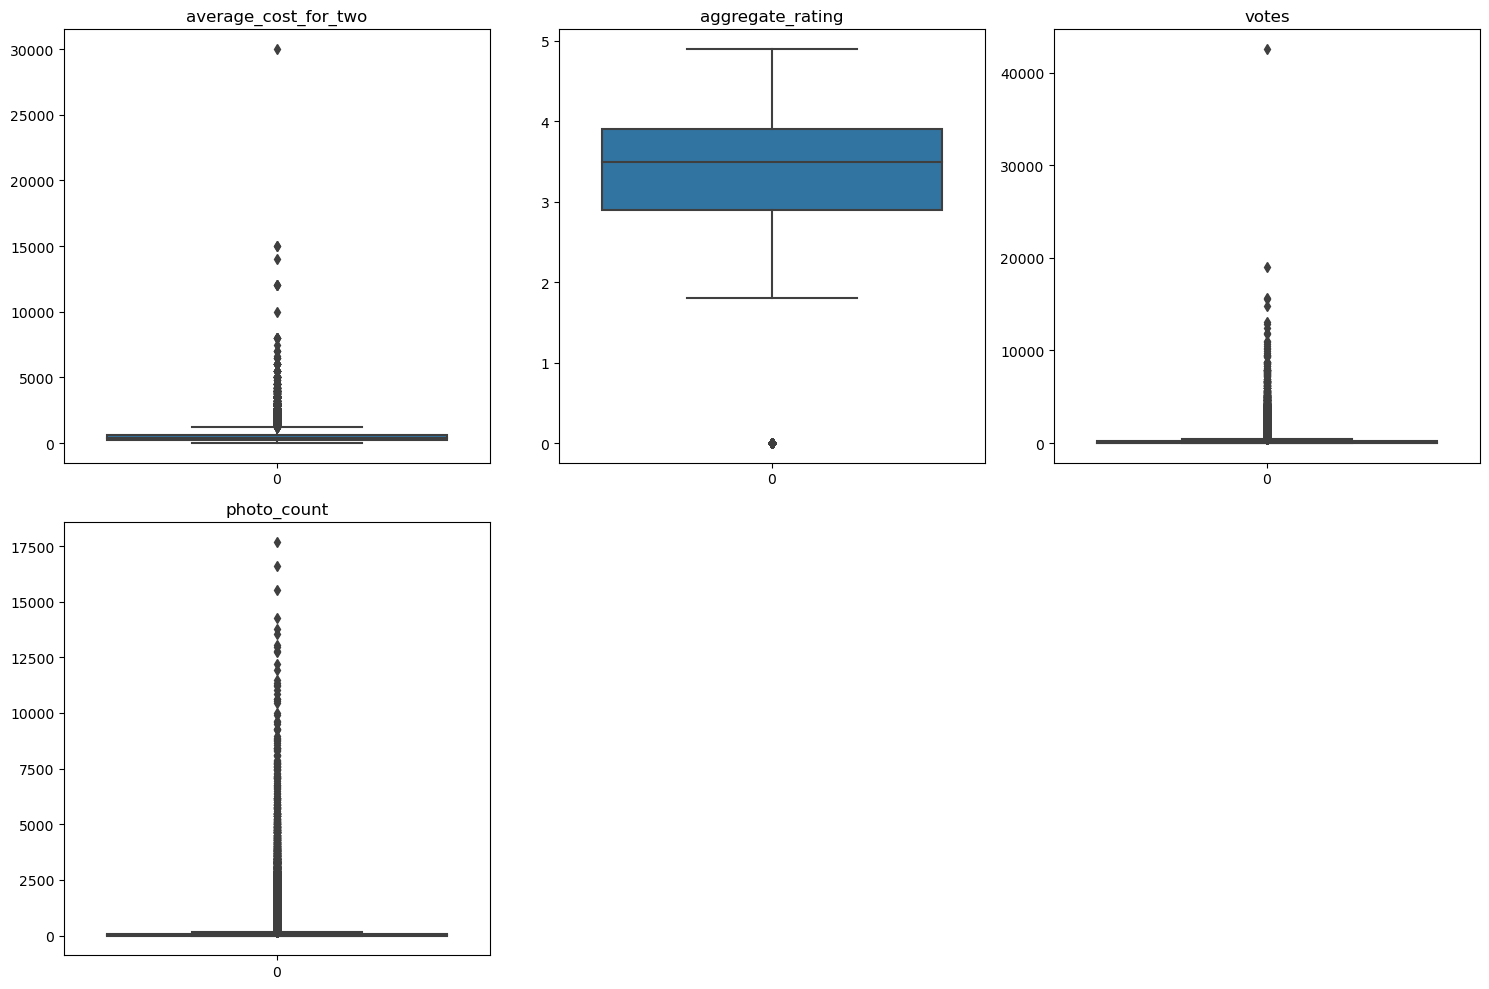

In [39]:
# Columns to check for outliers
numerical_columns = ['average_cost_for_two', 'aggregate_rating', 'votes', 'photo_count']

# Creating boxplots for each numerical column to visualize outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df_cln[col])
    plt.title(col)

plt.tight_layout()
plt.show()

The histogram below shows the distribution of ratings (aggregate_rating) in the dataset. Here are a few observations:

The distribution appears to be multi-modal, with several peaks.
There is a significant concentration of ratings around whole numbers (like 3.0, 4.0, etc.), which might suggest a tendency of users to give round-number ratings.
Next, let's analyze the distribution of the price range (price_range). This variable typically indicates the relative cost of dining at the establishment.

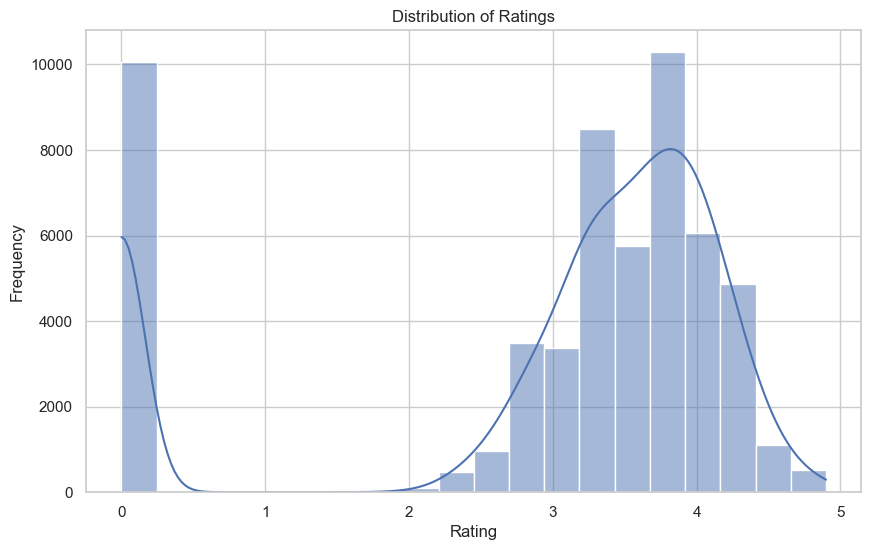

In [40]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_cln['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

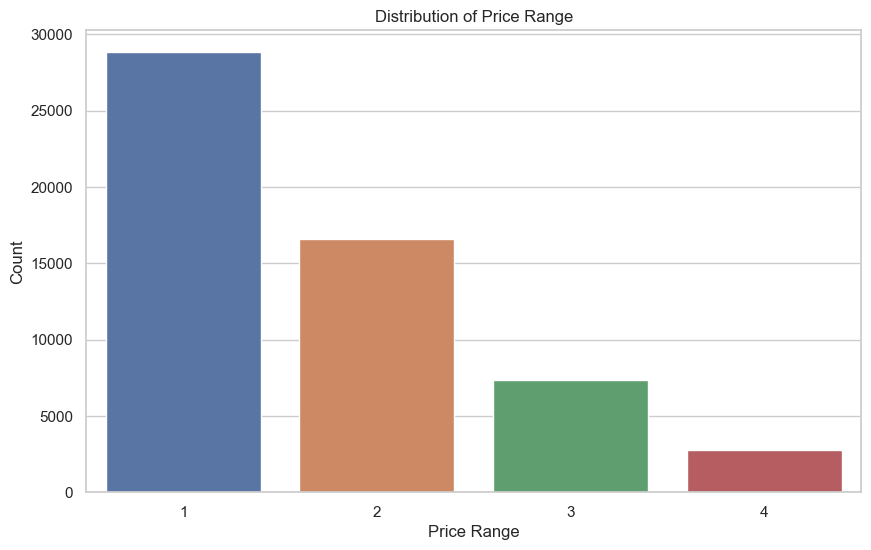

In [41]:
# Distribution of Price Range
plt.figure(figsize=(10, 6))
sns.countplot(x='price_range', data=df_cln)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

The bar plot above illustrates the top 10 cuisines in the dataset, based on their frequency of occurrence. Key observations:

Certain cuisines are much more prevalent than others, indicating a possible preference or greater availability of these cuisines in the establishments covered by this dataset.
The distribution shows a variety of cuisines, reflecting a diverse food culture.
Next, we'll examine the distribution of the votes variable. This variable indicates the number of votes each establishment has received, which can be a proxy for its popularity or customer engagement.

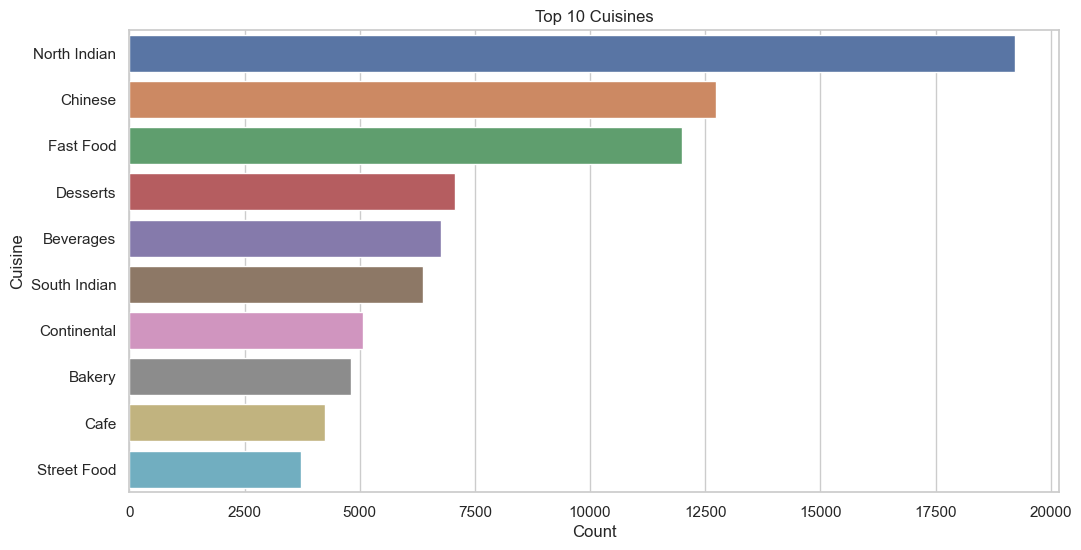

In [43]:
# Extracting individual cuisines and counting their frequencies
cuisine_list = df_cln['cuisines'].dropna().str.split(', ')
cuisine_counts = Counter(cuisine for cuisines in cuisine_list for cuisine in cuisines)

# Converting to a DataFrame for easier plotting
cuisine_df = pd.DataFrame(cuisine_counts.most_common(10), columns=['Cuisine', 'Count'])

# Plotting the top 10 cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Cuisine', data=cuisine_df)
plt.title('Top 10 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

The above graph shows the distribution of the votes variable, limited to the 95th percentile for better visualization (as the full range includes some very high vote counts that can skew the visual representation).

Observations:

The distribution is heavily right-skewed, indicating that most establishments have a relatively low number of votes, while a few have very high vote counts.
There's a long tail in the distribution, suggesting that while most establishments have few votes, a small number are extremely popular.
Now, let's look at the distribution of photo_count, which might give insights into how visually appealing or popular these establishments are in terms of customer photo uploads.

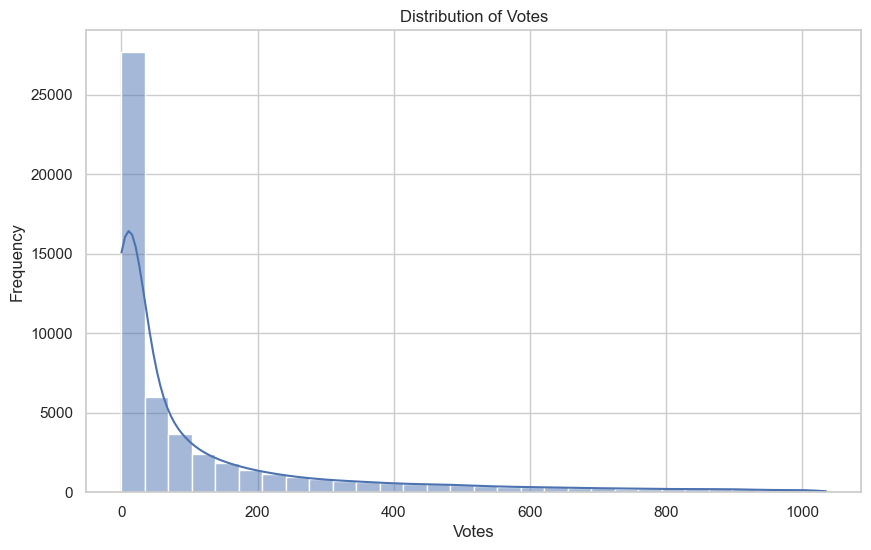

In [44]:
# Distribution of Votes
plt.figure(figsize=(10, 6))
sns.histplot(df_cln[df_cln['votes'] <= df_cln['votes'].quantile(0.95)]['votes'], bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of the photo_count variable, limited to the 95th percentile for a clearer view. Here are some insights:

Similar to the votes distribution, the photo_count distribution is also right-skewed. This indicates that most establishments have a lower number of photos, while a few have a very high photo count.
The long tail of the distribution suggests that a small number of establishments are particularly popular in terms of photo uploads.
Finally, let's analyze the distribution of Operational Days, which can give us an idea of how many days a week these establishments tend to operate.

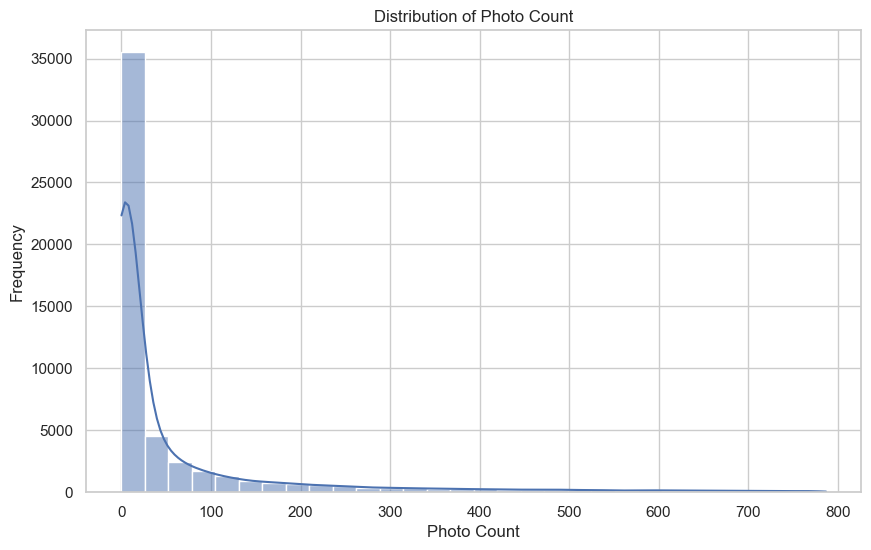

In [45]:
# Distribution of Photo Count
plt.figure(figsize=(10, 6))
sns.histplot(df_cln[df_cln['photo_count'] <= df_cln['photo_count'].quantile(0.95)]['photo_count'], bins=30, kde=True)
plt.title('Distribution of Photo Count')
plt.xlabel('Photo Count')
plt.ylabel('Frequency')
plt.show()

The bar plot shows the distribution of Operational Days per week for the establishments in the dataset. Here's what we can observe:

A significant majority of establishments operate 7 days a week, indicating a high level of availability and potential emphasis on consistent service throughout the week.
There are fewer establishments with fewer operational days, suggesting that most businesses in this dataset prefer to remain open every day.
This comprehensive distribution analysis provides insights into various aspects of the establishments in the dataset, including customer perceptions (ratings), affordability (price range), culinary variety (cuisines), popularity (votes and photo count), and operational patterns (operational days).

If there are any other specific analyses or variables you're interested in, please let me know!

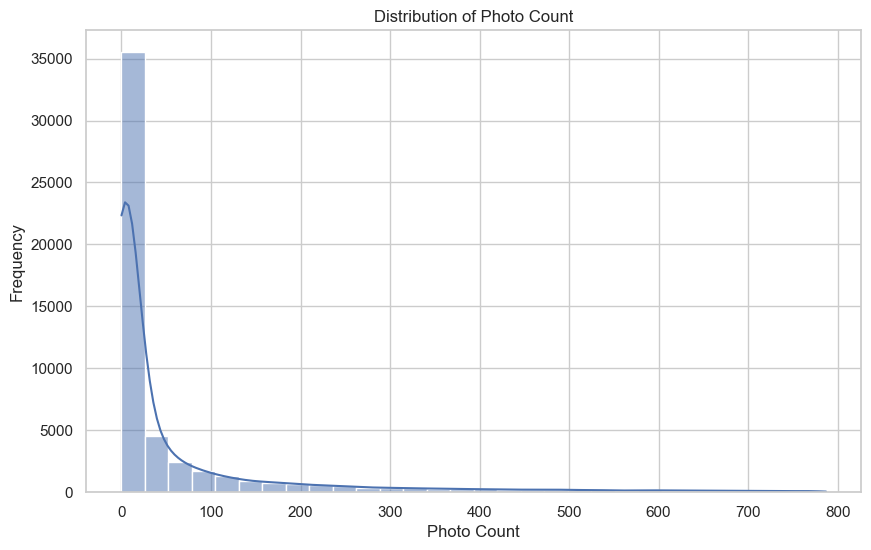

In [48]:
# Distribution of Photo Count
plt.figure(figsize=(10, 6))
sns.histplot(df_cln[df_cln['photo_count'] <= df_cln['photo_count'].quantile(0.95)]['photo_count'], bins=30, kde=True)
plt.title('Distribution of Photo Count')
plt.xlabel('Photo Count')
plt.ylabel('Frequency')
plt.show()

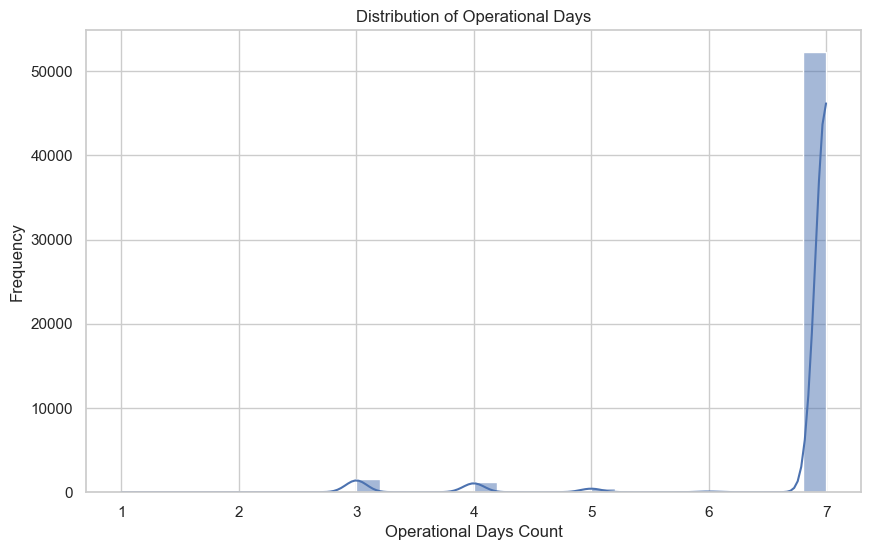

In [92]:
# Distribution of Photo Count
plt.figure(figsize=(10, 6))
sns.histplot(df_cln[df_cln['Operational Days'] <= df_cln['Operational Days'].quantile(0.95)]['Operational Days'], bins=30, kde=True)
plt.title('Distribution of Operational Days')
plt.xlabel('Operational Days Count')
plt.ylabel('Frequency')
plt.show()

To perform a correlation analysis, we'll focus on variables that are numeric or can be reasonably transformed into numeric values. In the df_cln dataset, we can consider the following variables for correlation analysis:

Ratings (aggregate_rating) - Reflects customer satisfaction.
Price Range (price_range) - Indicates the relative affordability of the establishment.
Votes (votes) - Can be a measure of popularity or engagement.
Photo Count (photo_count) - Another potential measure of popularity or customer interest.
Average Cost for Two (average_cost_for_two) - Indicates the average expense at the establishment.
Operational Days (Operational Days) - Reflects the operational pattern of the establishment.
We'll compute the Pearson correlation coefficient for these variables. This coefficient measures the linear relationship between variables and ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear correlation.

Let's start by examining the correlation matrix and then visualize it for better understanding.

The heatmap above visualizes the correlation matrix for the selected variables. Here are some key observations:

Ratings and Votes: There's a moderate positive correlation between aggregate_rating and votes. This suggests that higher-rated establishments tend to have more votes, which could imply greater popularity or customer engagement for higher-rated places.

Ratings and Photo Count: A similar moderate positive correlation is observed between aggregate_rating and photo_count, indicating that establishments with higher ratings also tend to have more customer-uploaded photos.

Price Range, Average Cost, and Ratings: Both price_range and average_cost_for_two show a positive correlation with aggregate_rating. This could imply that more expensive establishments tend to have higher ratings, though the correlation is not strong enough to suggest a direct or exclusive relationship.

Votes and Photo Count: There's a strong positive correlation between votes and photo_count. This is expected as both are indicators of customer engagement and popularity.

Operational Days: This variable shows a very low correlation with other variables, suggesting that the number of operational days per week doesn't significantly relate to factors like ratings, price, or customer engagement in this dataset.

These correlations can provide insights into how different aspects of these establishments relate to each other. However, it's important to remember that correlation does not imply causation, and further analysis would be needed to understand any causal relationships.

If you have specific pairs of variables you'd like to explore further or any other aspect of the data you're interested in, feel free to let me know!

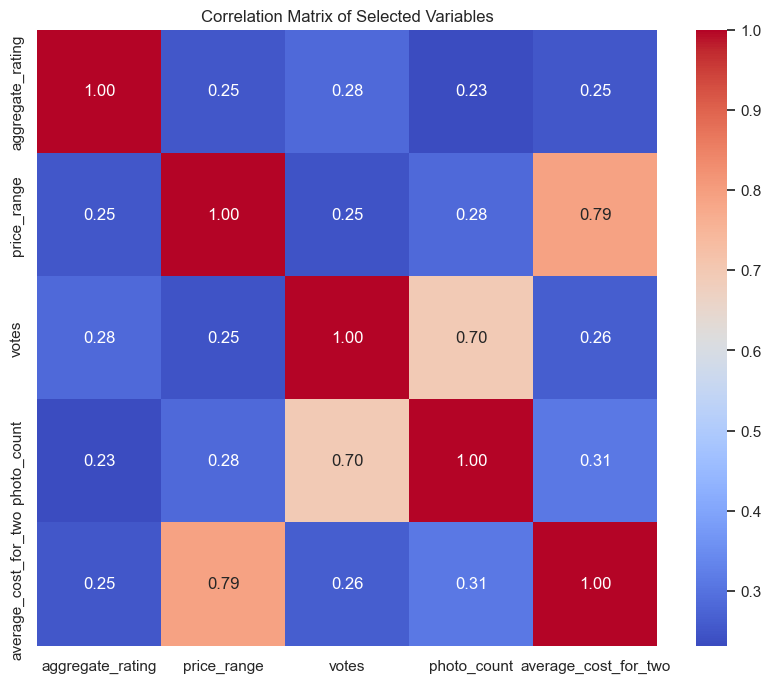

In [50]:
# Selecting relevant columns for correlation analysis
correlation_columns = ['aggregate_rating', 'price_range', 'votes', 'photo_count', 'average_cost_for_two']
correlation_df = df_cln[correlation_columns]

# Calculating the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

# Regional Analysis:

Compare the restaurant trends and customer preferences across different cities or regions in India

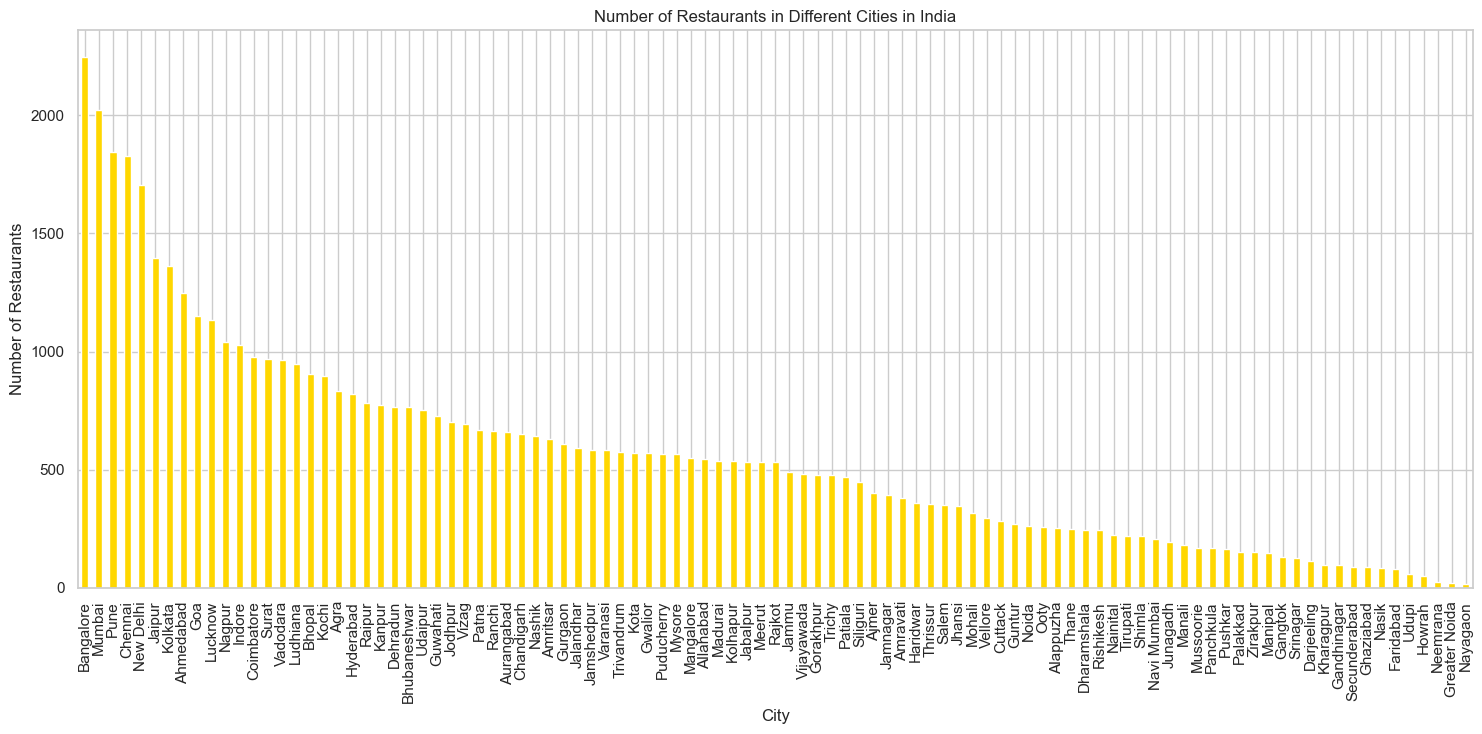

In [59]:
# Filter data for restaurants in India
df_indian_restaurants = df_cln[df_cln['country_id'] == 1]  # Assuming country_id 1 represents India

# Group by city or region and count the number of restaurants in each
restaurants_by_city = df_indian_restaurants.groupby('city')['res_id'].count().sort_values(ascending=False)

# Plotting the number of restaurants in each city
plt.figure(figsize=(15, 7.5))
restaurants_by_city.plot(kind='bar', color='gold')
plt.title('Number of Restaurants in Different Cities in India')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

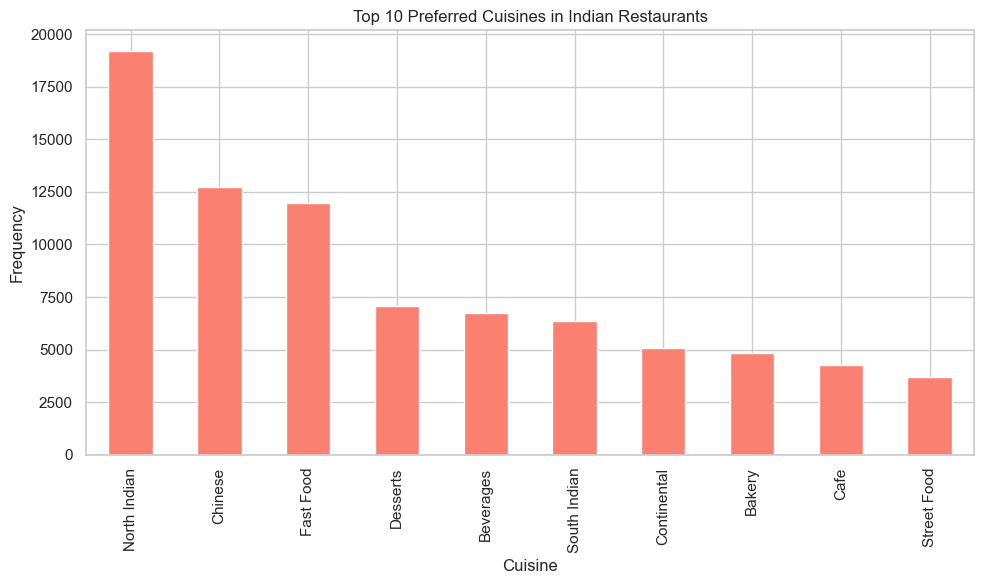

In [60]:
# Analyzing customer preferences - for example, cuisines
top_cuisines = df_indian_restaurants['cuisines'].str.split(', ', expand=True).stack().value_counts().head(10)

# Plotting the top cuisines preferred by customers
plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar', color='salmon')
plt.title('Top 10 Preferred Cuisines in Indian Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Identify unique characteristics of the dining scene in each region.

In [61]:
# Group restaurants by region and analyze cuisines
cuisines_by_region = df_indian_restaurants.groupby('city')['cuisines'].apply(lambda x: ', '.join(x)).reset_index()

# Restaurant types or establishments by region
establishments_by_region = df_indian_restaurants.groupby('city')['establishment'].apply(lambda x: ', '.join(x)).reset_index()

# Average cost for two and price ranges by region
avg_cost_by_region = df_indian_restaurants.groupby('city')['average_cost_for_two'].mean().reset_index()
price_ranges_by_region = df_indian_restaurants.groupby('city')['price_range'].mean().reset_index()

# Ratings and customer preferences by region
ratings_by_region = df_indian_restaurants.groupby('city')['aggregate_rating'].mean().reset_index()

# Displaying unique characteristics of dining scenes in each region
unique_characteristics = pd.merge(cuisines_by_region, establishments_by_region, on='city')
unique_characteristics = pd.merge(unique_characteristics, avg_cost_by_region, on='city')
unique_characteristics = pd.merge(unique_characteristics, price_ranges_by_region, on='city')
unique_characteristics = pd.merge(unique_characteristics, ratings_by_region, on='city')

# Explore the 'unique_characteristics' DataFrame to understand region-wise dining characteristics
print(unique_characteristics)


          city                                           cuisines  \
0         Agra  North Indian, South Indian, Mithai, Street Foo...   
1    Ahmedabad  North Indian, Chinese, Fast Food, Continental,...   
2        Ajmer  Continental, Beverages, South Indian, Fast Foo...   
3    Alappuzha  South Indian, Kerala, South Indian, Kerala, Be...   
4    Allahabad  North Indian, Burger, Fast Food, Bakery, Itali...   
..         ...                                                ...   
94    Varanasi  South Indian, Fast Food, Italian, Pizza, Chine...   
95     Vellore  Chinese, South Indian, BBQ, Italian, Chettinad...   
96  Vijayawada  Biryani, North Indian, South Indian, Chinese, ...   
97       Vizag  Biryani, Seafood, North Indian, Hyderabadi, Mu...   
98    Zirakpur  Cafe, Continental, Burger, Sandwich, Beverages...   

                                        establishment  average_cost_for_two  \
0   Quick Bites, Quick Bites, Quick Bites, Quick B...            520.925481   
1   Casual Di

In [93]:
# Group restaurants by region and analyze cuisines
cuisines_by_region = df_cln.groupby('city')['cuisines'].apply(lambda x: ', '.join(x.dropna())).reset_index()

# Restaurant types or establishments by region
establishments_by_region = df_cln.groupby('city')['establishment'].apply(lambda x: ', '.join(x.dropna())).reset_index()

# Average cost for two and price ranges by region
avg_cost_by_region = df_cln.groupby('city')['average_cost_for_two'].mean().reset_index()
price_ranges_by_region = df_cln.groupby('city')['price_range'].mean().reset_index()

# Ratings by region
ratings_by_region = df_cln.groupby('city')['aggregate_rating'].mean().reset_index()

# Merging all the data into a single DataFrame
unique_characteristics = pd.merge(cuisines_by_region, establishments_by_region, on='city')
unique_characteristics = pd.merge(unique_characteristics, avg_cost_by_region, on='city')
unique_characteristics = pd.merge(unique_characteristics, price_ranges_by_region, on='city')
unique_characteristics = pd.merge(unique_characteristics, ratings_by_region, on='city')

# Displaying unique characteristics of dining scenes in each region
unique_characteristics

,city,cuisines,establishment,average_cost_for_two,price_range,aggregate_rating
0,Agra,"North Indian, South Indian, Mithai, Street Foo...","Quick Bites, Quick Bites, Quick Bites, Quick B...",520.925481,1.718750,2.659976
1,Ahmedabad,"North Indian, Chinese, Fast Food, Continental,...","Casual Dining, Casual Dining, Casual Dining, C...",492.750601,1.798717,3.209623
2,Ajmer,"Continental, Beverages, South Indian, Fast Foo...","Casual Dining, Casual Dining, Quick Bites, Cas...",307.625000,1.360000,2.586500
3,Alappuzha,"South Indian, Kerala, South Indian, Kerala, Be...","Casual Dining, Casual Dining, Quick Bites, Cas...",302.549020,1.388235,0.379608
4,Allahabad,"North Indian, Burger, Fast Food, Bakery, Itali...","Quick Bites, Quick Bites, Café, Casual Dining,...",353.546618,1.928702,2.725229
...,...,...,...,...,...,...
94,Varanasi,"South Indian, Fast Food, Italian, Pizza, Chine...","Quick Bites, Casual Dining, Quick Bites, Quick...",476.037736,2.291595,3.018182
95,Vellore,"Chinese, South Indian, BBQ, Italian, Chettinad...","Casual Dining, Casual Dining, Casual Dining, C...",290.677966,1.301695,2.172881
96,Vijayawada,"Biryani, North Indian, South Indian, Chinese, ...","Casual Dining, Casual Dining, Quick Bites, Qui...",396.618257,1.605809,3.001245
97,Vizag,"Biryani, Seafood, North Indian, Hyderabadi, Mu...","Quick Bites, Casual Dining, Quick Bites, Quick...",443.363112,1.713256,3.160519


Analyze the types of cuisines that are popular in different regions.

In [62]:
# Group restaurants by region and analyze cuisines
restaurants_by_region = df_indian_restaurants.groupby('city').apply(lambda x: x.nlargest(5, 'votes')).reset_index(drop=True)

# Selecting relevant columns for analysis
selected_columns = ['res_id', 'name', 'city', 'cuisines', 'price_range', 'aggregate_rating']  # Adjust columns as needed

# Display major competitors based on cuisine, pricing, and ratings
competitors_by_region = restaurants_by_region[selected_columns]
print(competitors_by_region)

       res_id                            name      city  \
0     3400005  Mama Chicken Mama Franky House      Agra   
1     3400018                  Pinch Of Spice      Agra   
2     3400017                  Pinch Of Spice      Agra   
3     3400279                     Mc Donald's      Agra   
4     3400299                     Bikanervala      Agra   
..        ...                             ...       ...   
490    122831                     Burger King  Zirakpur   
491    123199                    Gourmet Nine  Zirakpur   
492    122262                  Domino's Pizza  Zirakpur   
493  18667611                          Subway  Zirakpur   
494  18453445                  The Spice Cave  Zirakpur   

                                              cuisines  price_range  \
0    North Indian, Mughlai, Rolls, Chinese, Fast Fo...            2   
1                   North Indian, Chinese, Continental            4   
2                       North Indian, Chinese, Mughlai            4   
3      

In [94]:
# Group restaurants by region and select top 5 based on votes
restaurants_by_region = df_cln.groupby('city').apply(lambda x: x.nlargest(5, 'votes')).reset_index(drop=True)

# Selecting relevant columns for analysis
selected_columns = ['res_id', 'name', 'city', 'cuisines', 'price_range', 'aggregate_rating']  # Adjust columns as needed

# Create a table to display major competitors by region
competitors_by_region = restaurants_by_region[selected_columns]

# Display the table
competitors_by_region

,res_id,name,city,cuisines,price_range,aggregate_rating
0,3400005,Mama Chicken Mama Franky House,Agra,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",2,4.4
1,3400018,Pinch Of Spice,Agra,"North Indian, Chinese, Continental",4,4.6
2,3400017,Pinch Of Spice,Agra,"North Indian, Chinese, Mughlai",4,4.6
3,3400279,Mc Donald's,Agra,"Burger, Fast Food",2,4.3
4,3400299,Bikanervala,Agra,"North Indian, South Indian, Mithai, Street Foo...",2,4.4
...,...,...,...,...,...,...
490,122831,Burger King,Zirakpur,"Burger, Fast Food, Beverages",2,3.9
491,123199,Gourmet Nine,Zirakpur,"Andhra, Goan, North Indian, Kerala",3,4.6
492,122262,Domino's Pizza,Zirakpur,"Pizza, Fast Food",1,3.8
493,18667611,Subway,Zirakpur,"Fast Food, Healthy Food",2,4.4


Analyze the strengths and weaknesses of these competitors

In [63]:
# Calculate average ratings and pricing for each competitor
avg_ratings = competitors_by_region.groupby('name')['aggregate_rating'].mean()
avg_pricing = competitors_by_region.groupby('name')['price_range'].mean()

# Assess strengths and weaknesses based on ratings and pricing
strengths = avg_ratings[avg_ratings >= 4.0]
reasonable_pricing = avg_pricing[avg_pricing <= 2]  # Assuming price range 1-2 as reasonable

weaknesses = avg_ratings[avg_ratings < 3.5]
limited_cuisines = competitors_by_region.groupby('name')['cuisines'].nunique()[competitors_by_region.groupby('name')['cuisines'].nunique() <= 2]

# Display strengths and weaknesses
print("Strengths (High Ratings & Reasonable Pricing):")
print(strengths)

print("\nWeaknesses (Low Ratings & Limited Cuisines):")
print(weaknesses)
print("\nRestaurants with Limited Cuisines:")
print(limited_cuisines)


Strengths (High Ratings & Reasonable Pricing):
name
11th Avenue Cafe Bistro                      4.20
60's Beatles Cafe                            4.00
99 Rotiwala                                  4.20
AB's - Absolute Barbecues                    4.85
Aar Kay Vaishno Dhaba                        4.30
                                             ... 
Zam Zam Palayam                              4.40
Zam Zam YMR                                  4.30
Zeeshan Restaurant - Apna Hyderabadi Food    4.30
Zooby's Kitchen                              4.40
Zuka                                         4.80
Name: aggregate_rating, Length: 293, dtype: float64

Weaknesses (Low Ratings & Limited Cuisines):
name
A2B- Adyar Ananda Bhavan           3.4
Abbiocco - Hotel Brahma Horizon    3.3
Amigo's                            3.3
Amigos Grill Cafe                  3.4
Cafe Nirvana                       3.2
Chotiwala                          3.4
Dehaati                            3.3
Dilkhush Food Point   

In [95]:
# Calculate average ratings and pricing for each competitor
avg_ratings = competitors_by_region.groupby('name')['aggregate_rating'].mean()
avg_pricing = competitors_by_region.groupby('name')['price_range'].mean()

# Assess strengths and weaknesses based on ratings and pricing
strengths = avg_ratings[avg_ratings >= 4.0].reset_index()
reasonable_pricing = avg_pricing[avg_pricing <= 2].reset_index()  # Assuming price range 1-2 as reasonable

weaknesses = avg_ratings[avg_ratings < 3.5].reset_index()
limited_cuisines = competitors_by_region.groupby('name')['cuisines'].nunique()
limited_cuisines = limited_cuisines[limited_cuisines <= 2].reset_index()

# Merge strengths and reasonable pricing
strengths_table = pd.merge(strengths, reasonable_pricing, on='name', how='inner')
strengths_table.columns = ['Name', 'Average Rating', 'Average Price Range']

# Merge weaknesses and limited cuisines
weaknesses_table = pd.merge(weaknesses, limited_cuisines, on='name', how='inner')
weaknesses_table.columns = ['Name', 'Average Rating', 'Number of Cuisines']

# Display strengths and weaknesses tables
print("Strengths (High Ratings & Reasonable Pricing):")
print(strengths_table)

print("\nWeaknesses (Low Ratings & Limited Cuisines):")
print(weaknesses_table)


Strengths (High Ratings & Reasonable Pricing):
                        Name  Average Rating  Average Price Range
0    11th Avenue Cafe Bistro             4.2                  2.0
1          60's Beatles Cafe             4.0                  2.0
2                99 Rotiwala             4.2                  2.0
3      Aar Kay Vaishno Dhaba             4.3                  1.0
4             Adda Unplugged             4.3                  2.0
..                       ...             ...                  ...
196                  Zaitoon             4.9                  2.0
197        Zam Zam Fast Food             4.4                  2.0
198          Zam Zam Palayam             4.4                  2.0
199              Zam Zam YMR             4.3                  2.0
200                     Zuka             4.8                  2.0

[201 rows x 3 columns]

Weaknesses (Low Ratings & Limited Cuisines):
                               Name  Average Rating  Number of Cuisines
0          A2B- Ady

Identify any gaps in the market that the restaurant chain can capitalize on (e.g., underrepresented cuisines, price ranges).

In [64]:
# Analyze underrepresented cuisines
all_cuisines = competitors_by_region['cuisines'].str.split(', ', expand=True).stack().value_counts()
underrepresented_cuisines = all_cuisines[all_cuisines < 2]  # Consider cuisines represented less than twice

# Assess gaps in price ranges
avg_pricing = competitors_by_region.groupby('name')['price_range'].mean()
potential_gaps_price = avg_pricing[avg_pricing > 2]  # Identify competitors with higher pricing

# Display identified gaps in cuisines and price ranges
print("Underrepresented Cuisines:")
print(underrepresented_cuisines)

print("\nPotential Gaps in Price Ranges (Higher Pricing):")
print(potential_gaps_price)

Underrepresented Cuisines:
Wraps             1
Mangalorean       1
Greek             1
Steak             1
Malwani           1
Middle Eastern    1
French            1
Israeli           1
Kashmiri          1
Parsi             1
Afghan            1
Name: count, dtype: int64

Potential Gaps in Price Ranges (Higher Pricing):
name
AB's - Absolute Barbecues                    3.0
Abbiocco - Hotel Brahma Horizon              4.0
Al Arabian Express                           3.0
Ambrai - Amet Haveli                         4.0
Amigo's                                      3.0
                                            ... 
Wake & Bake                                  3.0
Warehouse Cafe                               4.0
Yanki Sizzlers                               3.0
Zeeshan Restaurant - Apna Hyderabadi Food    3.0
Zooby's Kitchen                              3.0
Name: price_range, Length: 119, dtype: float64


In [96]:
# Analyze underrepresented cuisines
all_cuisines = competitors_by_region['cuisines'].str.split(', ', expand=True).stack().value_counts()
underrepresented_cuisines = all_cuisines[all_cuisines < 2].reset_index()
underrepresented_cuisines.columns = ['Cuisine', 'Count']

# Assess gaps in price ranges
avg_pricing = competitors_by_region.groupby('name')['price_range'].mean()
potential_gaps_price = avg_pricing[avg_pricing > 2].reset_index()  # Identify competitors with higher pricing
potential_gaps_price.columns = ['Name', 'Average Price Range']

# Display tables for underrepresented cuisines and potential gaps in price ranges
print("Underrepresented Cuisines:")
print(underrepresented_cuisines)

print("\nPotential Gaps in Price Ranges (Higher Pricing):")
print(potential_gaps_price)

Underrepresented Cuisines:
           Cuisine  Count
0            Wraps      1
1      Mangalorean      1
2            Greek      1
3            Steak      1
4          Malwani      1
5   Middle Eastern      1
6           French      1
7          Israeli      1
8         Kashmiri      1
9            Parsi      1
10          Afghan      1

Potential Gaps in Price Ranges (Higher Pricing):
                                          Name  Average Price Range
0                    AB's - Absolute Barbecues                  3.0
1              Abbiocco - Hotel Brahma Horizon                  4.0
2                           Al Arabian Express                  3.0
3                         Ambrai - Amet Haveli                  4.0
4                                      Amigo's                  3.0
..                                         ...                  ...
114                                Wake & Bake                  3.0
115                             Warehouse Cafe                  4.0

In [98]:
# Count the frequency of each restaurant's name
name_counts = df_cln['name'].value_counts()

# Define a function to classify each restaurant as 'Chain' or 'Non-Chain'
def classify_structure(name):
    return 'Chain' if name_counts[name] > 1 else 'Non-Chain'

# Apply the function to create the 'Structure' column using .loc
df_cln.loc[:, 'Structure'] = df_cln['name'].apply(classify_structure)

# Display the first few rows to verify the new column
df_cln[['name', 'Structure']].head()

,name,Structure
0,Bikanervala,Chain
1,Mama Chicken Mama Franky House,Non-Chain
2,Bhagat Halwai,Chain
3,Bhagat Halwai,Chain
4,The Salt Cafe Kitchen & Bar,Chain


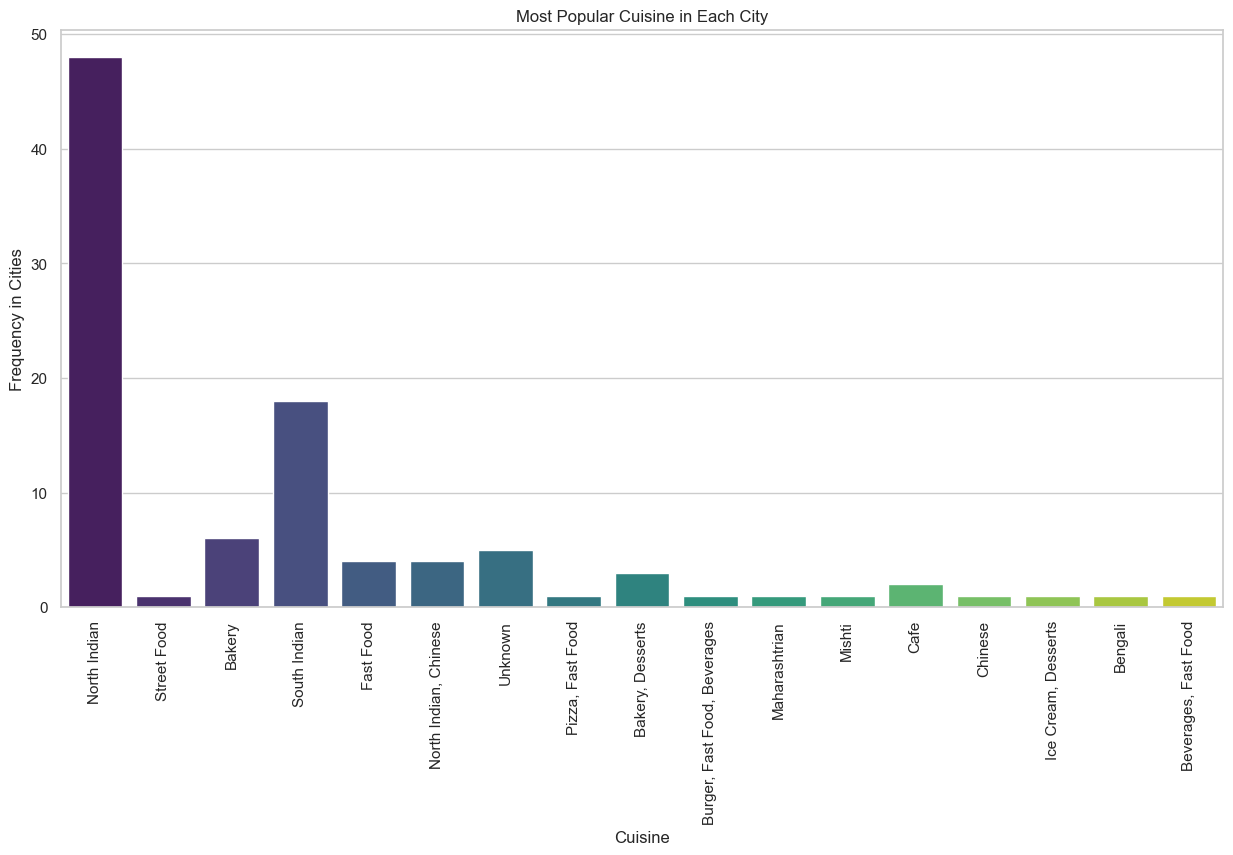

In [100]:
# 1. Cuisine Preferences by Region
# Get the top cuisine in each city based on frequency
top_cuisines_by_city = df_cln.groupby('city')['cuisines'].apply(lambda x: x.mode()[0]).reset_index()

# Create a count plot to show the most popular cuisine in each city
plt.figure(figsize=(15, 7.5))
sns.countplot(x='cuisines', data=top_cuisines_by_city, palette='viridis')
plt.title('Most Popular Cuisine in Each City')
plt.xlabel('Cuisine')
plt.ylabel('Frequency in Cities')
plt.xticks(rotation=90)
plt.show()

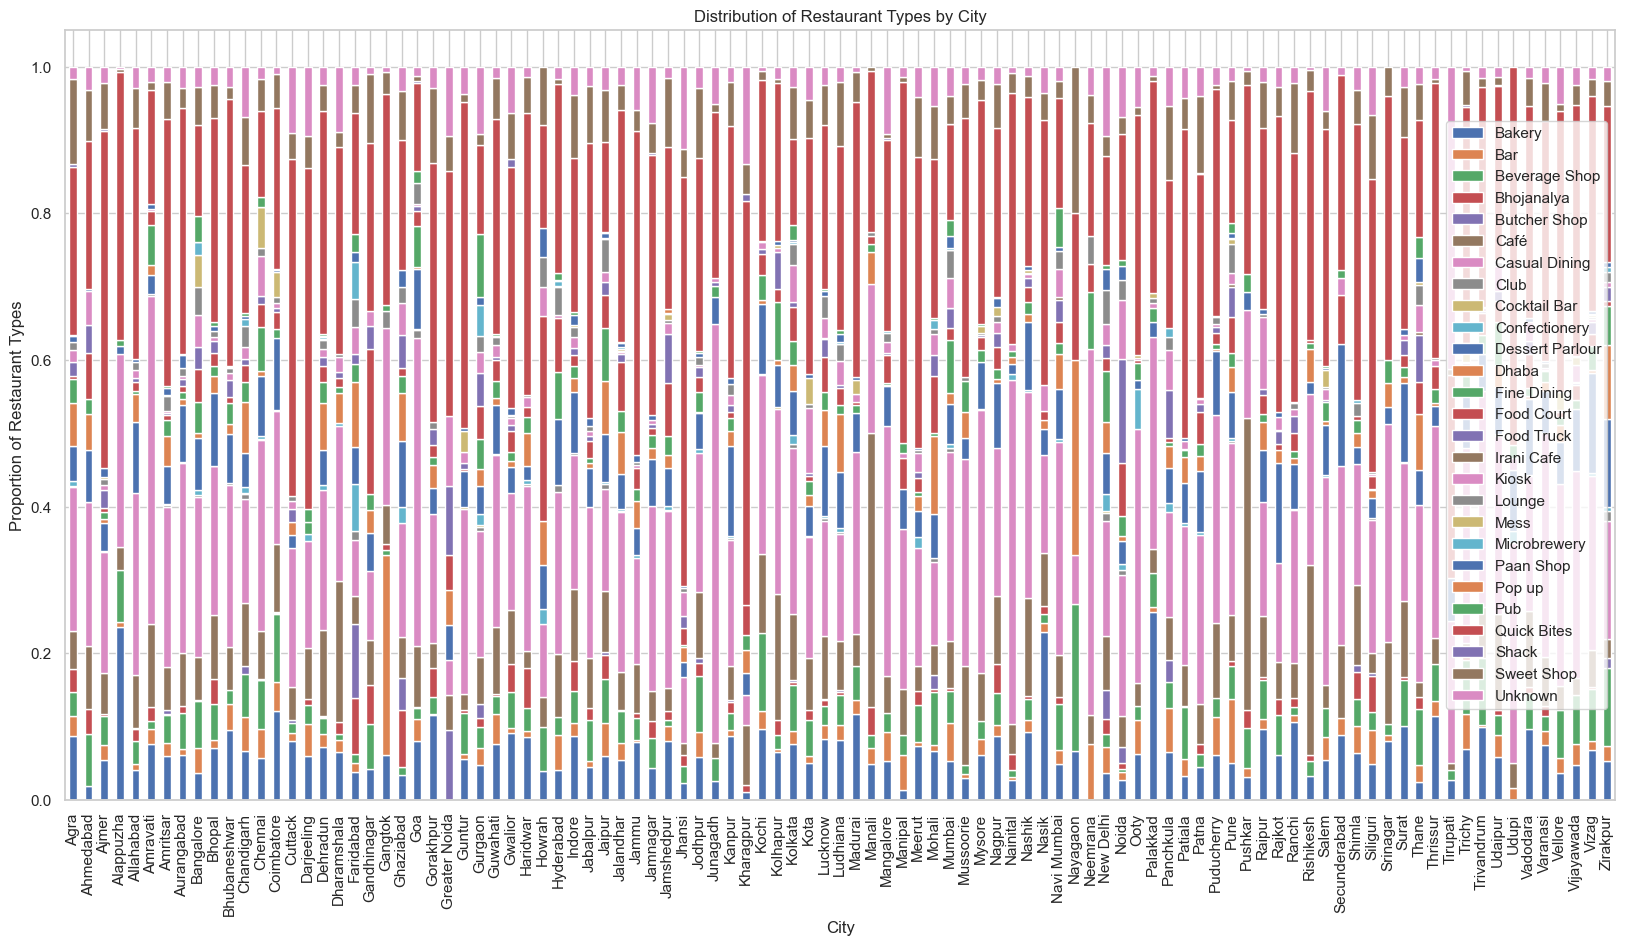

In [111]:
# 3. Distribution of Restaurant Types by City
restaurant_types = df_cln['establishment'].str.get_dummies(sep=', ')
restaurant_types_by_city = restaurant_types.join(df_cln['city']).groupby('city').mean()
restaurant_types_by_city.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Restaurant Types by City')
plt.xlabel('City')
plt.ylabel('Proportion of Restaurant Types')
plt.xticks(rotation=90)
plt.show()

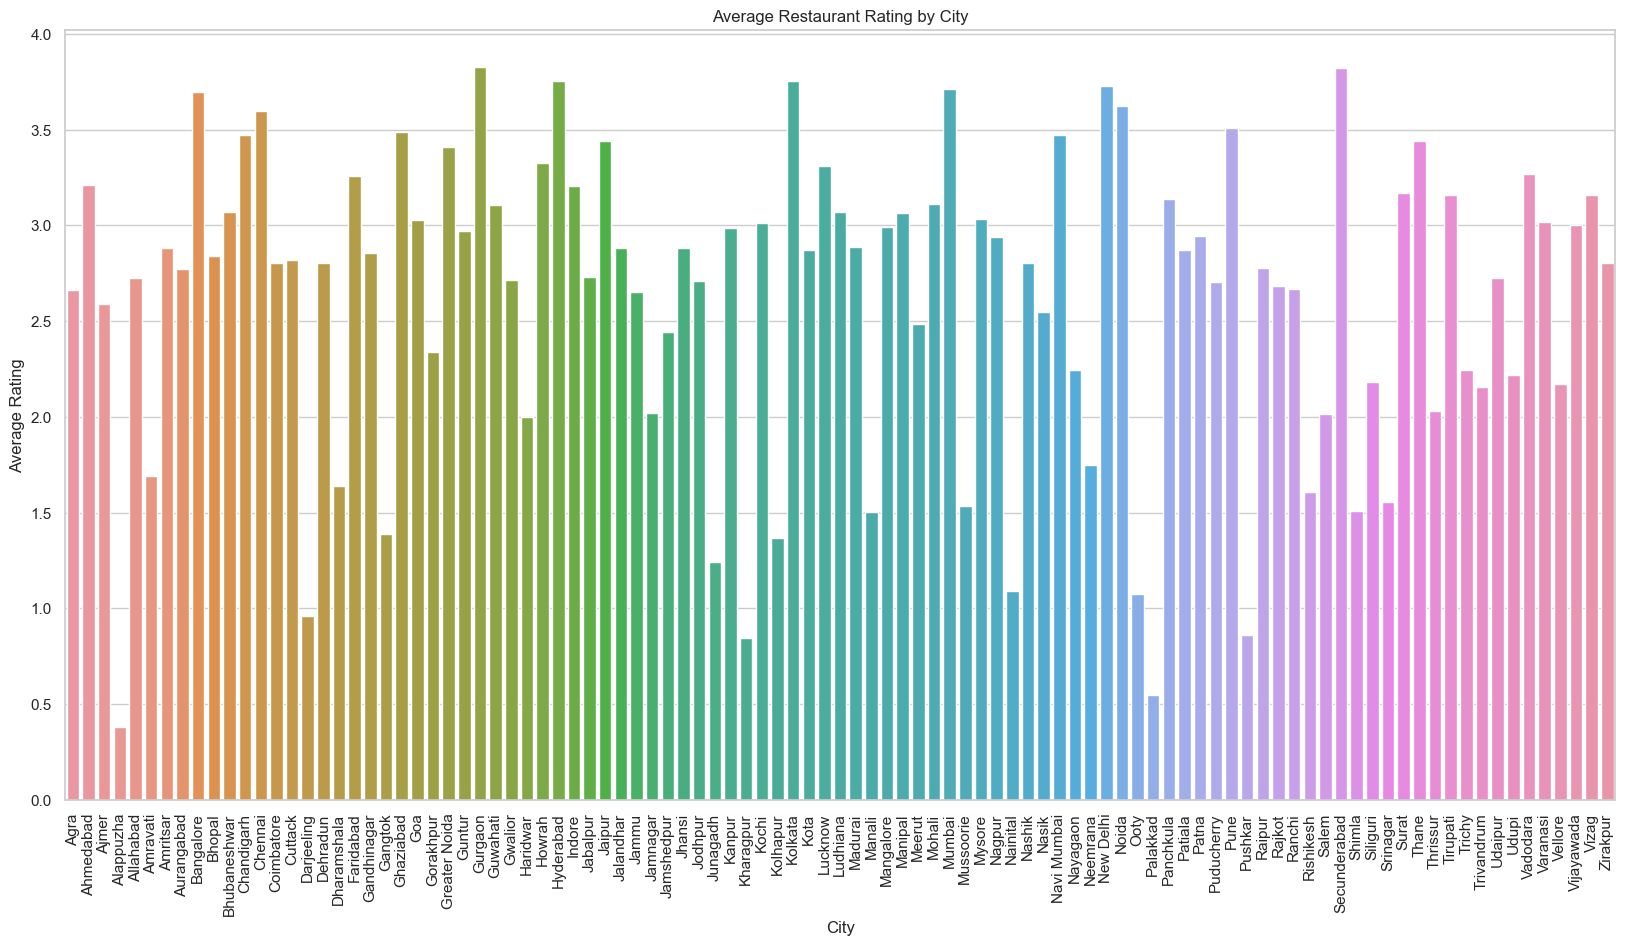

In [110]:
# 2. Average Rating by City
avg_rating_by_city = df_cln.groupby('city')['aggregate_rating'].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='city', y='aggregate_rating', data=avg_rating_by_city)
plt.title('Average Restaurant Rating by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

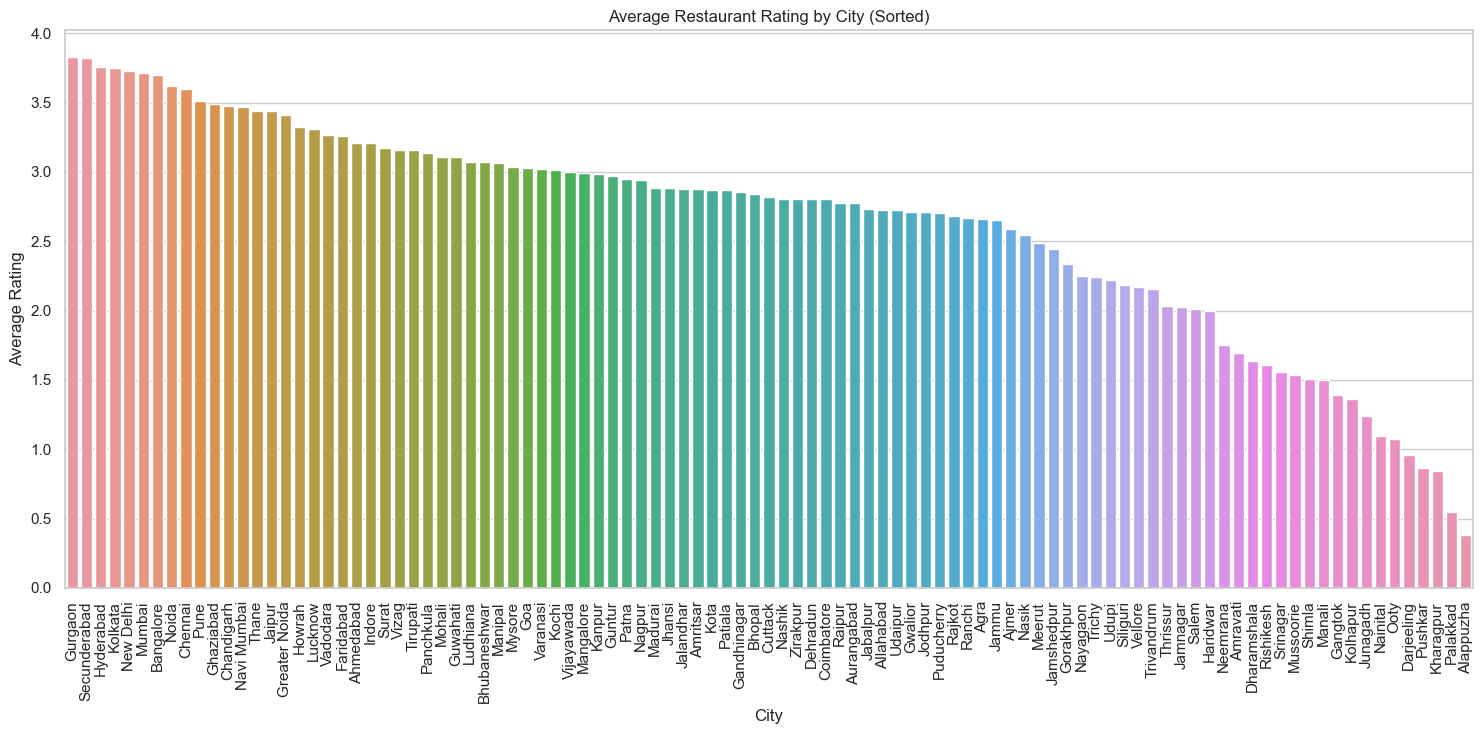

In [105]:
# 2. Average Rating by City - Sorted
avg_rating_by_city = df_cln.groupby('city')['aggregate_rating'].mean().reset_index()
avg_rating_by_city_sorted = avg_rating_by_city.sort_values(by='aggregate_rating', ascending=False)

# Plotting the sorted average ratings
plt.figure(figsize=(15, 7.5))
sns.barplot(x='city', y='aggregate_rating', data=avg_rating_by_city_sorted)
plt.title('Average Restaurant Rating by City (Sorted)')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

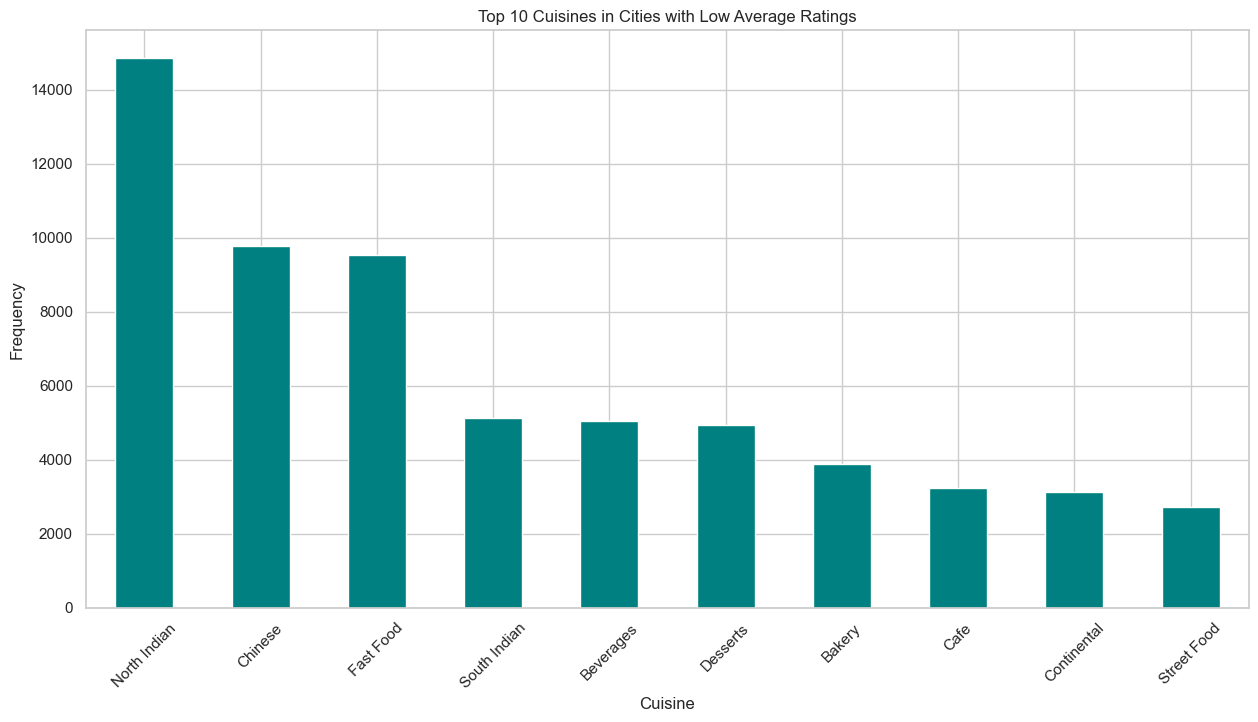

In [106]:
# Set a threshold for low average rating, for example, ratings below 3.5
low_rating_threshold = 3.5

# Identify cities with low average ratings
low_rating_cities = avg_rating_by_city[avg_rating_by_city['aggregate_rating'] < low_rating_threshold]

# Filter the main dataset for restaurants in low rating cities
df_low_rating_cities = df_cln[df_cln['city'].isin(low_rating_cities['city'])]

# Analyze the cuisines in these cities
cuisines_in_low_rating_cities = df_low_rating_cities['cuisines'].str.split(', ', expand=True).stack().value_counts()

# Plotting the types of cuisines in low rating cities
plt.figure(figsize=(15, 7.5))
cuisines_in_low_rating_cities.head(10).plot(kind='bar', color='teal')  # Displaying top 10 cuisines
plt.title('Top 10 Cuisines in Cities with Low Average Ratings')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

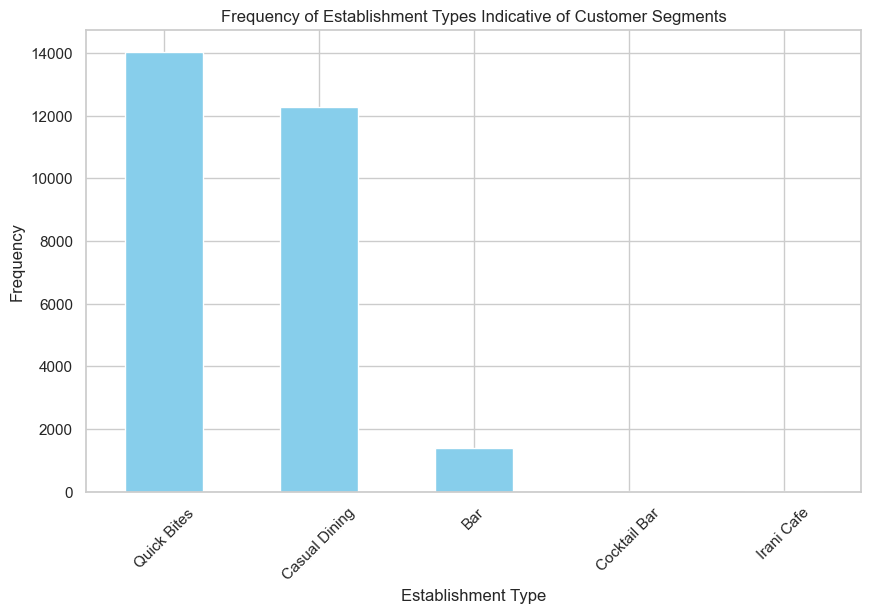

In [108]:
# Example establishments indicative of customer segments
establishments_of_interest = ['Casual Dining', 'Family Style', 'Cafe', 'Bar', 'Quick Bites']

# Filter the dataset for these establishments
df_establishments = df_cln[df_cln['establishment'].str.contains('|'.join(establishments_of_interest))]

# Count the occurrences of each establishment type
establishment_counts = df_establishments['establishment'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
establishment_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Establishment Types Indicative of Customer Segments')
plt.xlabel('Establishment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()